# Imports and configs

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("darkgrid")

# Load data

In [3]:
df = pd.read_csv(r'..\datasets\data\ds_salaries.csv', sep=",", index_col=0)
# https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries?resource=download&select=ds_salaries.csv
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [4]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2, random_state=1321)

# Data exploration

### General informations about content

In [5]:
df.info()
#Widać, że większość feature'ów będzie kategoryczna a wszystkie kolumny mają jednakową ilość not-nulli

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 56.9+ KB


In [6]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

### Text type columns preview

In [7]:
text_columns = df_train.select_dtypes(include=['object'])
for column in text_columns:
    print(f"\n{df_train[column].value_counts()}")



SE    228
MI    173
EN     65
EX     19
Name: experience_level, dtype: int64

FT    471
PT      7
FL      4
CT      3
Name: employment_type, dtype: int64

Data Scientist                              109
Data Engineer                               104
Data Analyst                                 86
Machine Learning Engineer                    33
Research Scientist                           14
Data Architect                               10
Machine Learning Scientist                    7
Data Science Manager                          7
Big Data Engineer                             6
Principal Data Scientist                      6
Applied Data Scientist                        5
Computer Vision Engineer                      5
Data Engineering Manager                      5
Data Analytics Manager                        5
Lead Data Engineer                            5
BI Data Analyst                               5
Data Science Consultant                       5
Head of Data                

In [8]:
text_columns_few_categories = ['experience_level', 'employment_type', 'company_size']

for column in text_columns_few_categories:
    print(f"\n{df_train[column].value_counts()}")
    
#Experience:
# EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level / Director

#Employment type:
# PT Part-time FT Full-time CT Contract FL Freelance

#Company size:
# S less than 50 employees (small) M 50 to 250 employees (medium) L more than 250 employees (large)


SE    228
MI    173
EN     65
EX     19
Name: experience_level, dtype: int64

FT    471
PT      7
FL      4
CT      3
Name: employment_type, dtype: int64

M    264
L    154
S     67
Name: company_size, dtype: int64


In [9]:
text_columns_many_categories = ['job_title', 'salary_currency', 'employee_residence', 'company_location']
for column in text_columns_many_categories:
    print(f"\n{df_train[column].value_counts().head()}")


Data Scientist               109
Data Engineer                104
Data Analyst                  86
Machine Learning Engineer     33
Research Scientist            14
Name: job_title, dtype: int64

USD    327
EUR     74
GBP     38
INR     16
CAD     13
Name: salary_currency, dtype: int64

US    272
GB     39
CA     22
IN     18
DE     18
Name: employee_residence, dtype: int64

US    293
GB     40
CA     23
DE     19
IN     15
Name: company_location, dtype: int64


### Numerical columns preview

In [10]:
df_train.describe()

# Remote ratio ranges:
# 0 No remote work (less than 20%) 50 Partially remote 100 Fully remote (more than 80%)

,work_year,salary,salary_in_usd,remote_ratio
count,485.000000,4.850000e+02,485.000000,485.000000
mean,2021.406186,2.551077e+05,114542.179381,69.793814
std,0.702683,8.753840e+05,72672.826950,41.659268
min,2020.000000,4.000000e+03,2859.000000,0.000000
25%,2021.000000,6.900000e+04,63900.000000,50.000000
50%,2022.000000,1.129000e+05,104702.000000,100.000000
75%,2022.000000,1.600800e+05,150000.000000,100.000000
max,2022.000000,1.100000e+07,600000.000000,100.000000


array([[<AxesSubplot: title={'center': 'work_year'}>,
        <AxesSubplot: title={'center': 'salary'}>],
       [<AxesSubplot: title={'center': 'salary_in_usd'}>,
        <AxesSubplot: title={'center': 'remote_ratio'}>]], dtype=object)

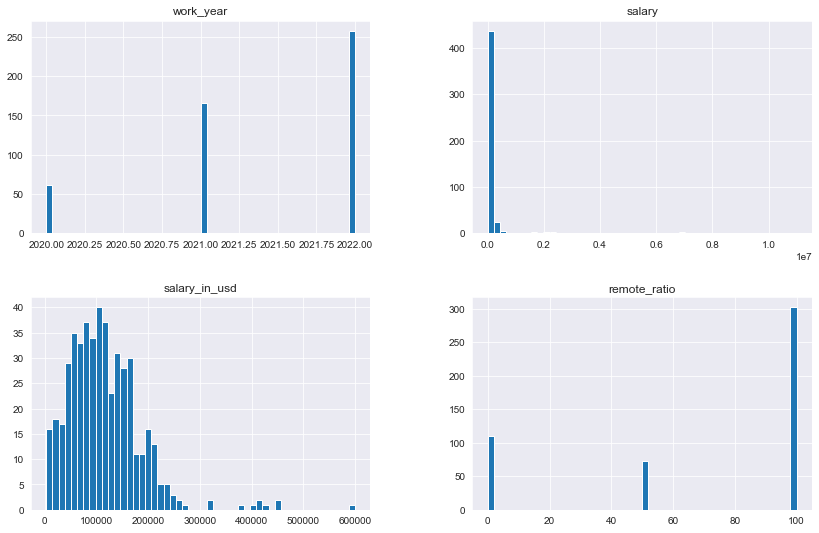

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
df_train.hist(bins=50, figsize=(14,9)) #Liczba binsów 

Text(0.5, 1.0, 'Dodged histogram')

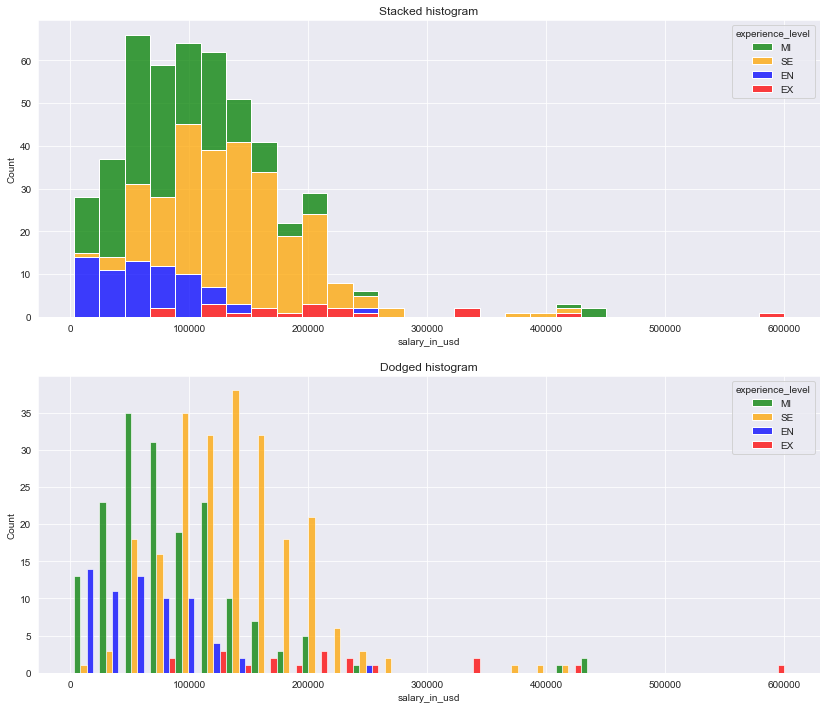

In [12]:
# Define the color palette for the experience levels
palette = {"EN": "blue", "MI": "green", "SE": "orange", "EX": "red"} #Pallete is optional, but i want make colors meaningfulls for myself to analyze

# Create a grid of two subplots, with the first subplot on top and the second one at the bottom
fig, axs = plt.subplots(2, 1, figsize=(14, 12))

# Plot the first histogram on the top subplot
sns.histplot(df_train, x="salary_in_usd", hue="experience_level", multiple="stack", ax=axs[0], palette=palette)

# Plot the second histogram on the bottom subplot
sns.histplot(df_train, x="salary_in_usd", hue="experience_level", multiple="dodge", ax=axs[1], palette=palette)

# Add titles to the subplots
axs[0].set_title("Stacked histogram")
axs[1].set_title("Dodged histogram")



### Analizy wyrabych zmiennych

In [13]:
df_train.columns #Wypisanie kolumn przed wybraniem tych, które nas interesują

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [14]:
df_train = df[['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size']]

In [15]:
corr_matrix = df_train.corr()
corr_matrix

,work_year,salary_in_usd,remote_ratio
work_year,1.000000,0.170493,0.076314
salary_in_usd,0.170493,1.000000,0.132122
remote_ratio,0.076314,0.132122,1.000000


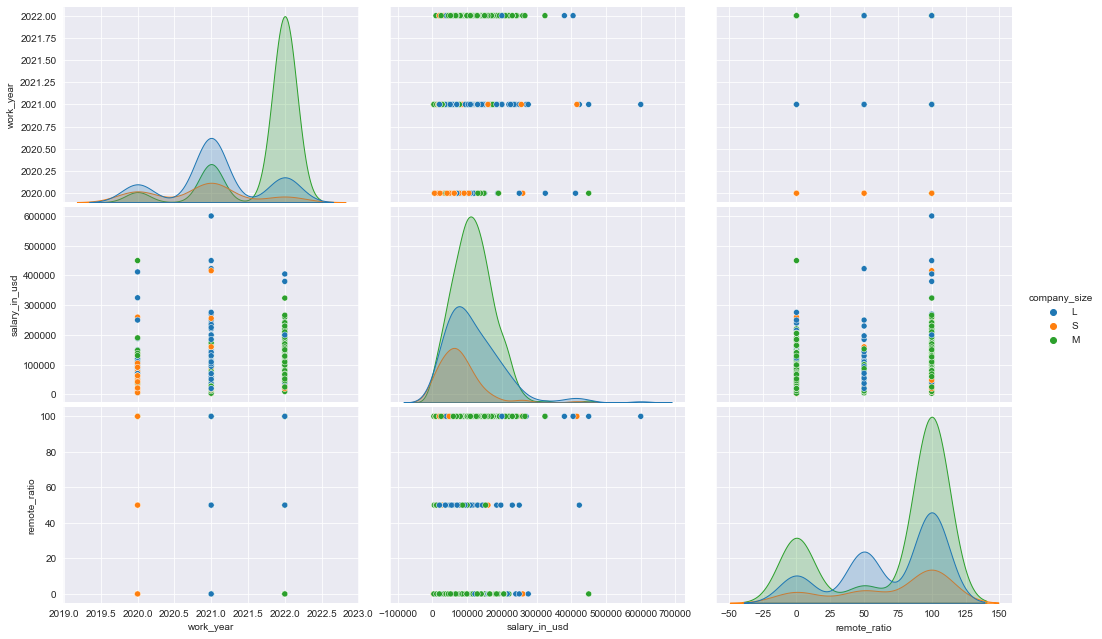

In [16]:
sns.pairplot(df_train, height=3, aspect=1.6, hue='company_size')

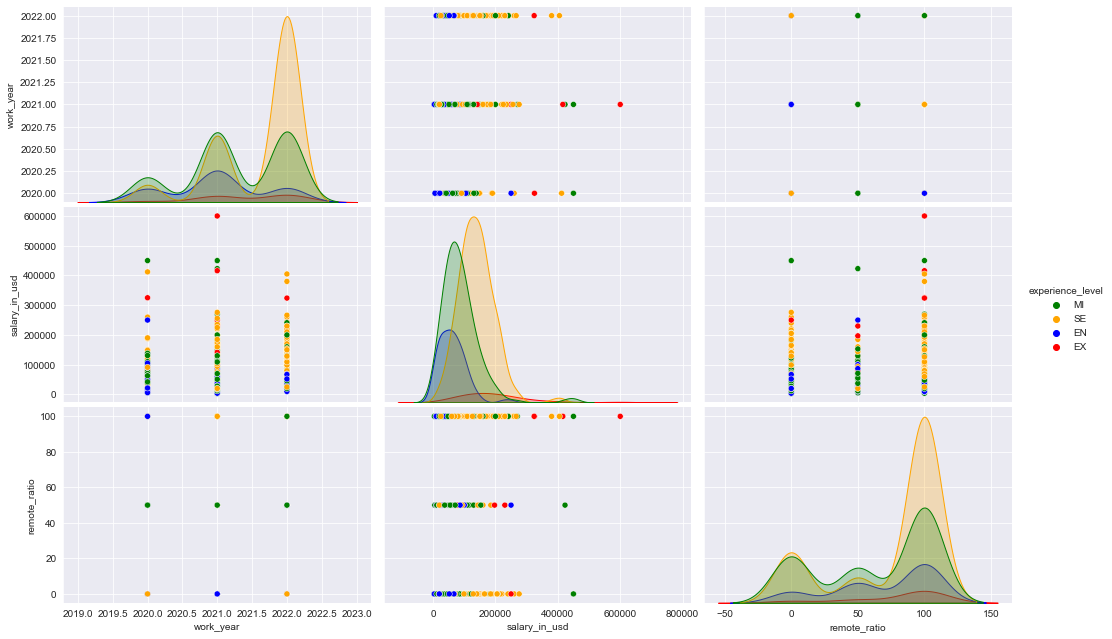

In [17]:
sns.pairplot(df_train, height=3, aspect=1.6, hue='experience_level', palette=palette,)

### Data transformations

In [18]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

class NewColGenerator(BaseEstimator, TransformerMixin):
    def __init__(self, columns_to_generate):
        if 'employee_in_company_location' in columns_to_generate:
            self.employee_in_company_location = True
        else:
            self.employee_in_company_location = False

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if self.employee_in_company_location:
            X['employee_in_company_location'] = (X['employee_residence'] == X['company_location']).astype(int)
        return X

class OneHotEncoderForGivenColumns(BaseEstimator, TransformerMixin):  
    def __init__(self, columns_to_encode=None):
        if columns_to_encode is None:
            self.columns_to_encode = []
        else:
            self.columns_to_encode = columns_to_encode
        self.encoded_columns = None

    def fit(self, X, y=None):
        self.encoded_columns = pd.get_dummies(X, columns=self.columns_to_encode).columns
        return self

    def transform(self, X):
        X_new = pd.get_dummies(X, columns=self.columns_to_encode, dtype=int)
        return X_new.reindex(columns=self.encoded_columns, fill_value=0)


In [19]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn import set_config
set_config(transform_output = "pandas")

df_train_transformed = df_train.drop('salary_in_usd', axis=1)
df_train_targets = df_train['salary_in_usd']

ct = ColumnTransformer(
    [
        # ('standardscaler', StandardScaler(), ['salary_in_usd']),
        ('minmaxscaler', MinMaxScaler(), ['work_year', 'remote_ratio']),
        ('ohe', OneHotEncoder(sparse_output=False), ['experience_level', 'employment_type', 'job_title', 'employee_residence', 'company_location', 'company_size']),
    ],
    remainder='passthrough')


preprocess_pipeline = make_pipeline(
    NewColGenerator(['employee_in_company_location']), #It wasn't workign with column_transformer so i extracted it here
    ct
)

df_train_transformed = preprocess_pipeline.fit_transform(df_train_transformed)

In [20]:
from joblib import dump, load
dump(preprocess_pipeline, r'..\datasets\joblibs\ds_salaries_pipe.joblib')

['..\\datasets\\joblibs\\ds_salaries_pipe.joblib']

In [21]:
df_train_transformed['salary_in_usd'] = df_train_targets
df_train_transformed.head()

,minmaxscaler__work_year,minmaxscaler__remote_ratio,ohe__experience_level_EN,ohe__experience_level_EX,ohe__experience_level_MI,ohe__experience_level_SE,ohe__employment_type_CT,ohe__employment_type_FL,ohe__employment_type_FT,ohe__employment_type_PT,...,ohe__company_location_SI,ohe__company_location_TR,ohe__company_location_UA,ohe__company_location_US,ohe__company_location_VN,ohe__company_size_L,ohe__company_size_M,ohe__company_size_S,remainder__employee_in_company_location,salary_in_usd
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,79833
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,260000
2,0.0,0.5,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,109024
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,20000
4,0.0,0.5,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1,150000


In [22]:
dump(df_train_transformed, r'..\datasets\joblibs\ds_salaries_train.joblib')

['..\\datasets\\joblibs\\ds_salaries_train.joblib']

In [23]:

df_test_transformed = df_test.drop('salary_in_usd', axis=1)
df_test_targets = df_test['salary_in_usd']
df_test_transformed = preprocess_pipeline.transform(df_test_transformed)

df_test_transformed['salary_in_usd'] = df_test_targets
df_test_transformed.head()

,minmaxscaler__work_year,minmaxscaler__remote_ratio,ohe__experience_level_EN,ohe__experience_level_EX,ohe__experience_level_MI,ohe__experience_level_SE,ohe__employment_type_CT,ohe__employment_type_FL,ohe__employment_type_FT,ohe__employment_type_PT,...,ohe__company_location_SI,ohe__company_location_TR,ohe__company_location_UA,ohe__company_location_US,ohe__company_location_VN,ohe__company_size_L,ohe__company_size_M,ohe__company_size_S,remainder__employee_in_company_location,salary_in_usd
451,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,78791
423,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,180000
278,0.5,0.5,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1,20171
191,0.5,0.5,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,21844
435,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,91614


In [24]:
dump(df_test_transformed, r'..\datasets\joblibs\ds_salaries_test.joblib')

['..\\datasets\\joblibs\\ds_salaries_test.joblib']

# Some prediction example

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

models = {
    'LinearRegression':LinearRegression(), 
    'DecisionTreeRegressor':DecisionTreeRegressor(random_state=1321), 
    'RandomForestRegressor':RandomForestRegressor(n_estimators=100, random_state=1321), 
    'SVR':SVR(kernel="linear"), 
}

In [58]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [89]:
for name, model in models.items():

    print(f"{name:22s}:", end="\t")
    model.fit(df_train_transformed.drop('salary_in_usd', axis=1), df_train_transformed['salary_in_usd'])
    
    #Training data:
    y_pred = model.predict(df_train_transformed.drop('salary_in_usd', axis=1))
    mse = mean_squared_error(df_train_transformed['salary_in_usd'], y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(df_train_transformed['salary_in_usd'], y_pred)
    print(f"TRAIN - RMSE: {rmse:.4f};  MAE:{mae:.4f}", end="")

    #Test data
    y_pred = model.predict(df_test_transformed.drop('salary_in_usd', axis=1))
    mse = mean_squared_error(df_test_transformed['salary_in_usd'], y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(df_test_transformed['salary_in_usd'], y_pred)
    print(f" | TEST - RMSE: {rmse:.4f}; MAE:{mae:.4f}")

LinearRegression      :	TRAIN - RMSE: 38909.9936;  MAE:25986.1839 | TEST - RMSE: 33256.2373; MAE:22763.4344
DecisionTreeRegressor :	TRAIN - RMSE: 23526.9128;  MAE:12513.5611 | TEST - RMSE: 20936.7875; MAE:10380.0873
RandomForestRegressor :	TRAIN - RMSE: 28533.5656;  MAE:18957.4162 | TEST - RMSE: 24127.5997; MAE:16649.8831
SVR                   :	TRAIN - RMSE: 71601.7154;  MAE:51812.7768 | TEST - RMSE: 62750.7466; MAE:49643.4201
